
## Plot Metrics: Training Time vs. EER

This cell reads the model metrics from `model_metrics.csv` and creates a scatter plot comparing the training time (in seconds) versus the Equal Error Rate (EER). Each model is annotated on the plot.



Metrics Data:
                                       Model  Training Time (sec)  Accuracy  \
0                              Random Forest                31.20    0.9963   
1                              Decision Tree                18.30    0.9823   
2                        Logistic Regression                21.49    0.9403   
3                                   LightGBM                 2.28    0.9992   
4                       MLP (Neural Network)                11.94    0.9817   
5                                        SVM                40.60    0.9257   
6                               PySR (Basic)               250.51    0.8997   
7                        PySR (L2MarginLoss)               178.19    0.9041   
8                               PySR (Basic)                95.43    0.9001   
9                            PySR (Extended)               221.83    0.9354   
10                            PySR (Complex)               418.49    0.9287   
11                              PySR (

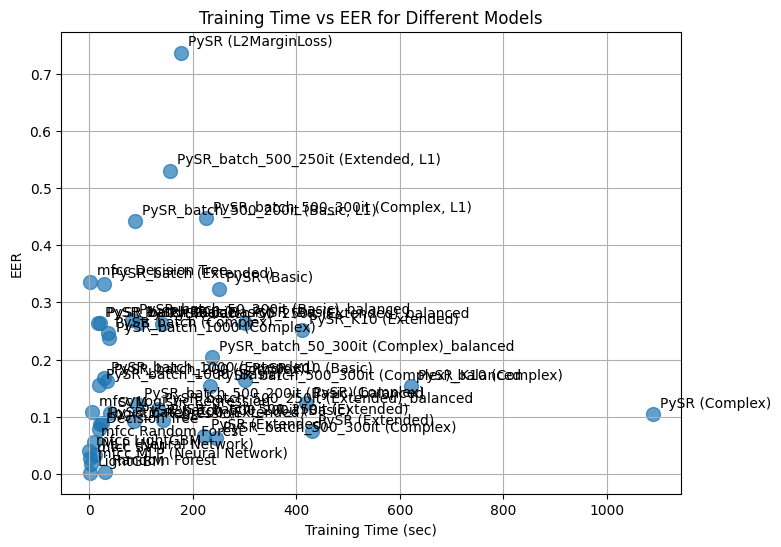

In [2]:

# %% Read CSV and plot metrics
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file containing metrics
df_metrics = pd.read_csv("model_metrics_val.csv")
print("Metrics Data:")
print(df_metrics)

# Create a scatter plot: Training Time vs EER
plt.figure(figsize=(8, 6))
plt.scatter(df_metrics["Training Time (sec)"], df_metrics["EER"], s=100, alpha=0.7)

# Label the axes and title
plt.xlabel("Training Time (sec)")
plt.ylabel("EER")
plt.title("Training Time vs EER for Different Models")

# Annotate each point with the model name
for idx, row in df_metrics.iterrows():
    plt.annotate(row["Model"], (row["Training Time (sec)"], row["EER"]),
                 textcoords="offset points", xytext=(5,5), ha="left")

plt.grid(True)
plt.show()

In [11]:
df_metrics.sort_values(by='EER')

,Model,Training Time (sec),Accuracy,EER
3,LightGBM,2.28,0.9992,0.0020
0,Random Forest,31.20,0.9963,0.0039
48,mfcc MLP (Neural Network),3.42,0.9880,0.0157
42,mfcc MLP (Neural Network),3.38,0.9888,0.0177
60,mfcc MLP (Neural Network),3.41,0.9888,0.0177
...,...,...,...,...
45,mfcc Decision Tree,1.37,0.9243,0.3497
29,"PySR_batch_500_200it (Basic, L1)",88.06,0.9007,0.4420
31,"PySR_batch_500_300it (Complex, L1)",225.07,0.9007,0.4479
30,"PySR_batch_500_250it (Extended, L1)",156.05,0.9029,0.5305


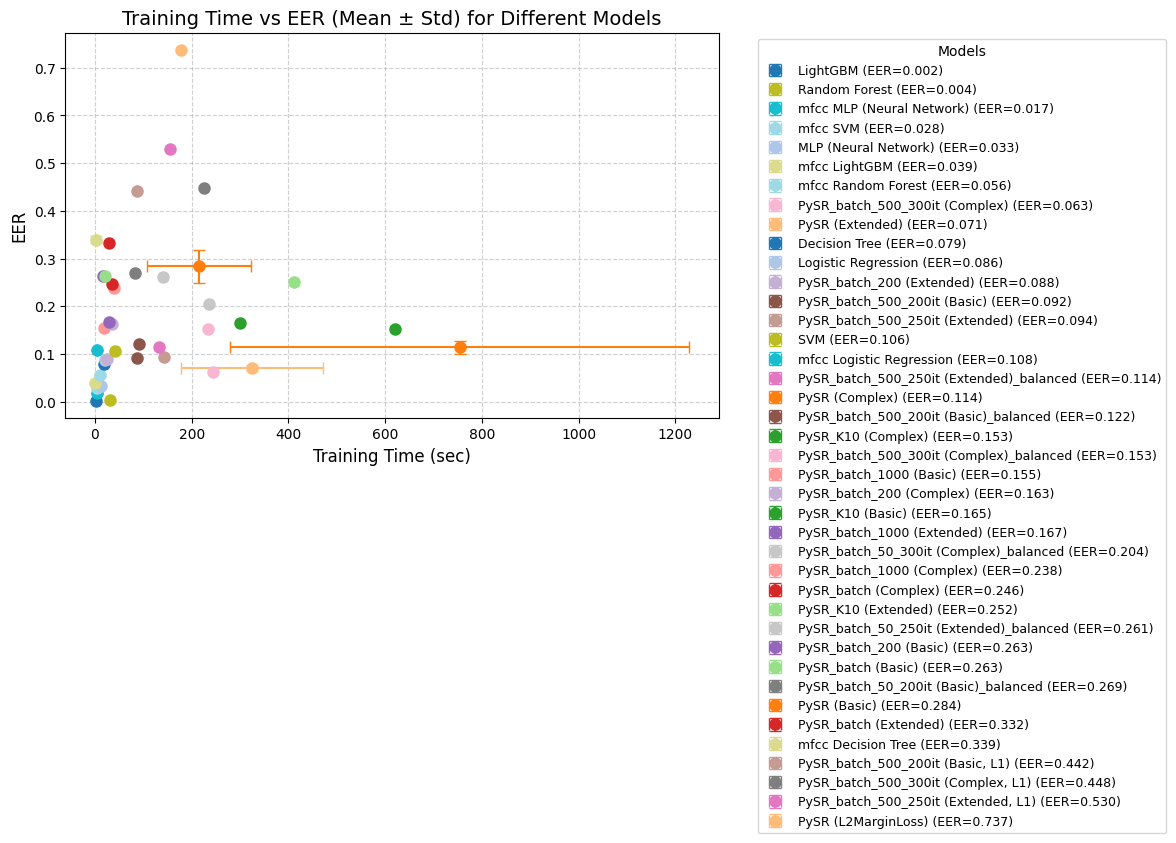

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Carregar métricas
df_metrics = pd.read_csv("model_metrics_val.csv")

# Agrupar e organizar
agg = df_metrics.groupby("Model").agg({
    "Training Time (sec)": ["mean", "std"],
    "EER": ["mean", "std"]
}).reset_index()
agg.columns = ["Model", "Time_mean", "Time_std", "EER_mean", "EER_std"]
agg = agg.sort_values("EER_mean")

# Cores consistentes
colors = cm.tab20(np.linspace(0, 1, len(agg)))

# Figura
plt.figure(figsize=(12, 7))

# Plot com legenda tradicional (colorida + EER incluído)
for i, row in agg.iterrows():
    label = f"{row['Model']} (EER={row['EER_mean']:.3f})"
    plt.errorbar(
        row["Time_mean"], row["EER_mean"],
        xerr=row["Time_std"], yerr=row["EER_std"],
        fmt='o', capsize=4, markersize=8,
        label=label, color=colors[i]
    )

# Layout
plt.xlabel("Training Time (sec)", fontsize=12)
plt.ylabel("EER", fontsize=12)
plt.title("Training Time vs EER (Mean ± Std) for Different Models", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Legenda tradicional colorida e fora do gráfico
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()
